In [2]:
library(readxl)

hawaii <- read_excel('../data/hawaii-5-11-22.xls', sheet = 'Complete') # [, c(3, 5:7, 9:17)]

Warning message:
"Expecting logical in W1463 / R1463C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1464 / R1464C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1465 / R1465C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1466 / R1466C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1467 / R1467C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1468 / R1468C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1469 / R1469C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1470 / R1470C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1471 / R1471C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1472 / R1472C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1473 / R1473C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1474 / R1474C23: got 'HISTORICAL [21288]'"
Warn

## List of Major Elements
- SiO2
- Al2O3
- FeO*
- MgO
- CaO
- Na2O
- K2O

## List of Minor Elements
- TiO2
- MnO
- P2O5

In [3]:
library(tidyverse)

numerical_data <- hawaii %>% select_if(is.numeric) # Filter out non-numerical fields
primaries <- select(numerical_data, "SIO2(WT%)", "TIO2(WT%)", "AL2O3(WT%)", "FeO*", "CAO(WT%)", "MGO(WT%)", "MNO(WT%)", "K2O(WT%)", "NA2O(WT%)", "P2O5(WT%)") 

imputated <- primaries %>% mutate_all(~ ifelse(is.na(.x), median(.x, na.rm = T), .)) # Impute missing values with median
non_imputated <- primaries[complete.cases(primaries), ]

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


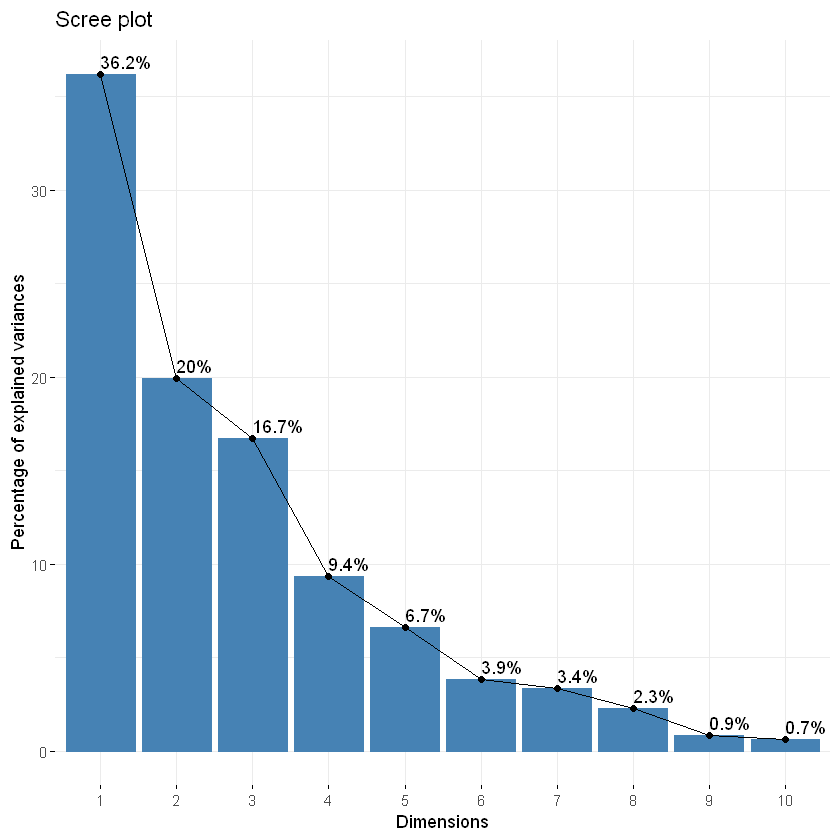

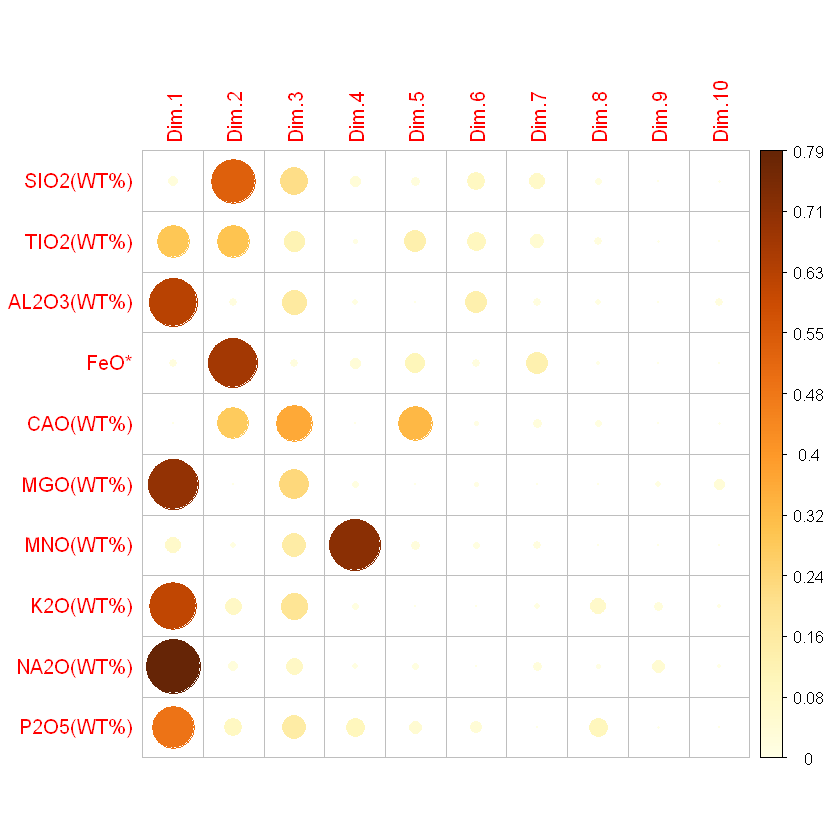

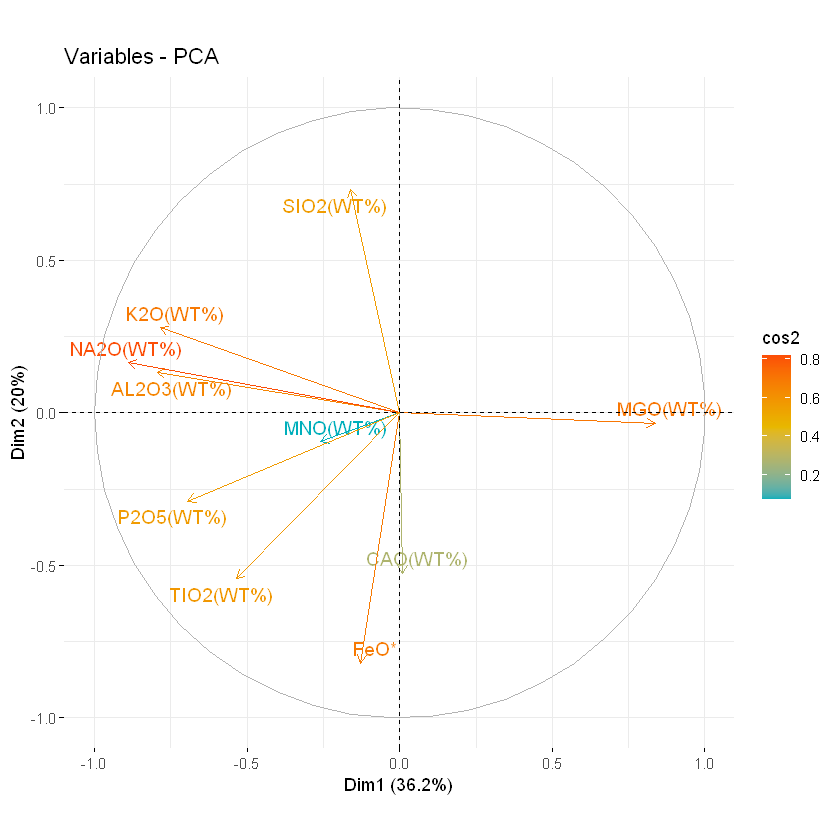

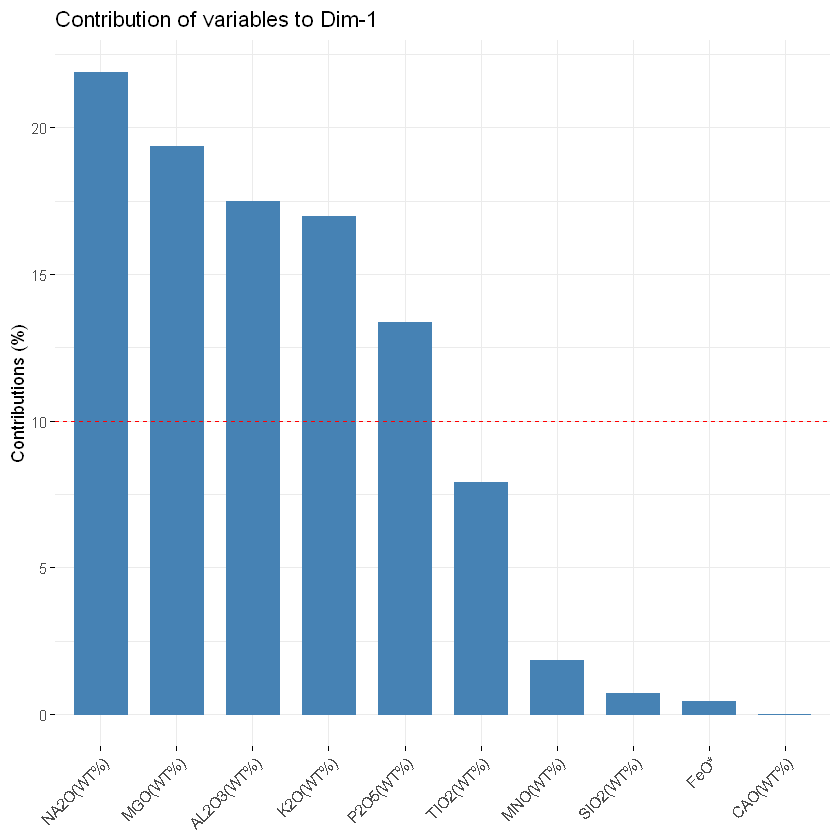

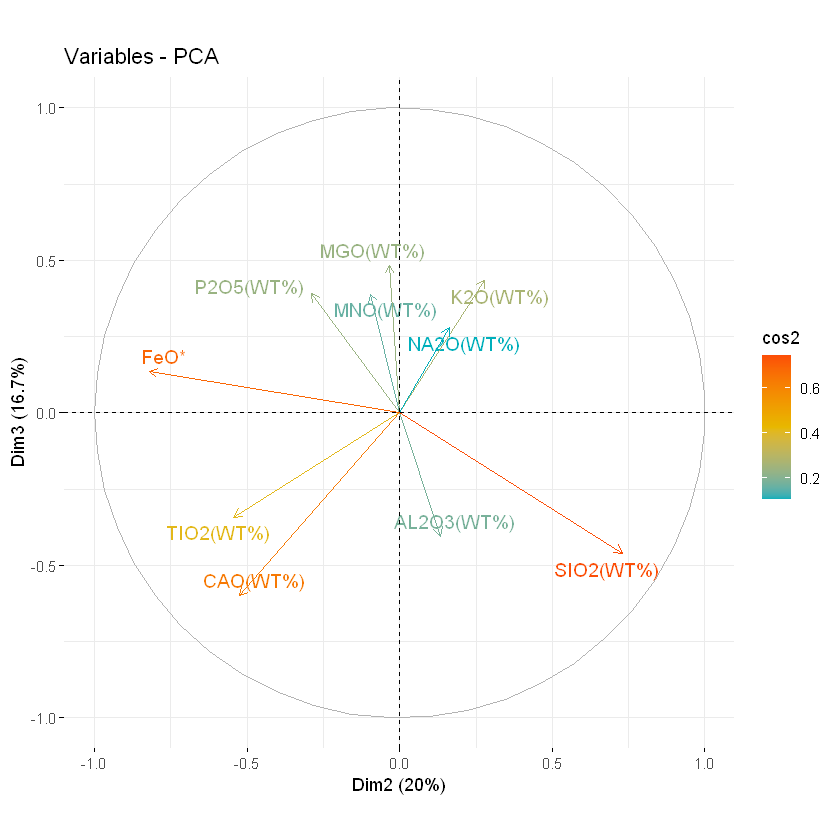

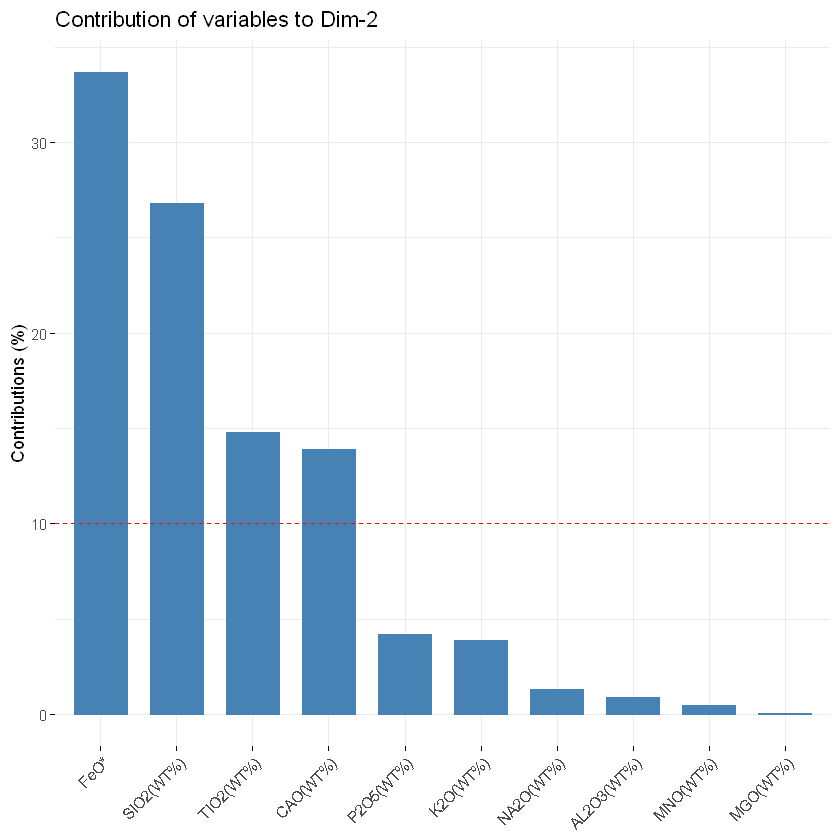

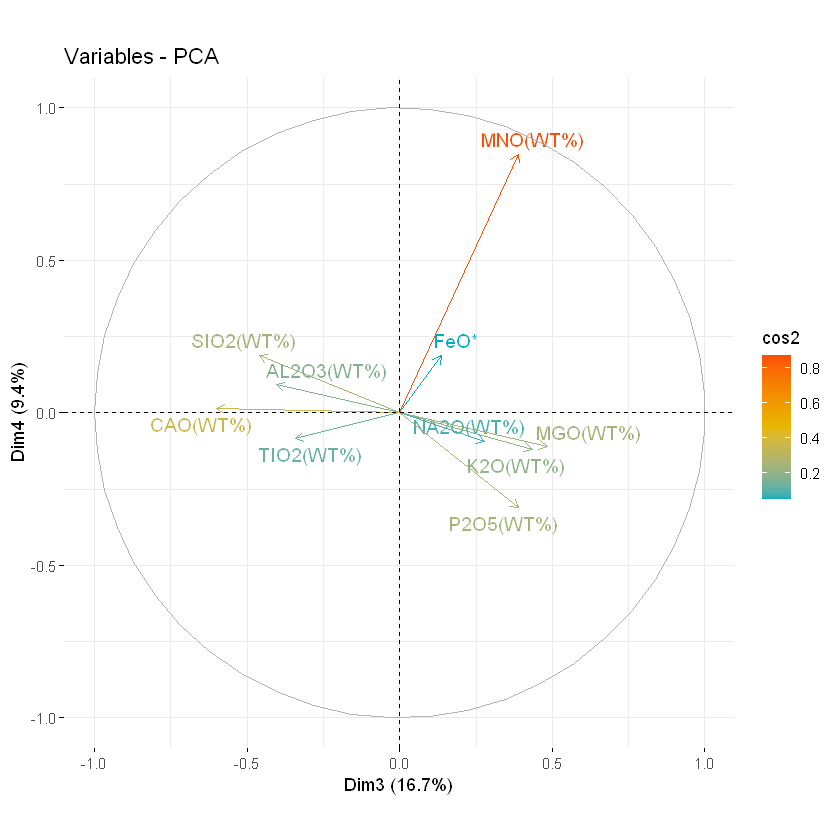

ERROR: Error in .get_facto_class(X): An object of class : kmeans can't be handled by factoextra


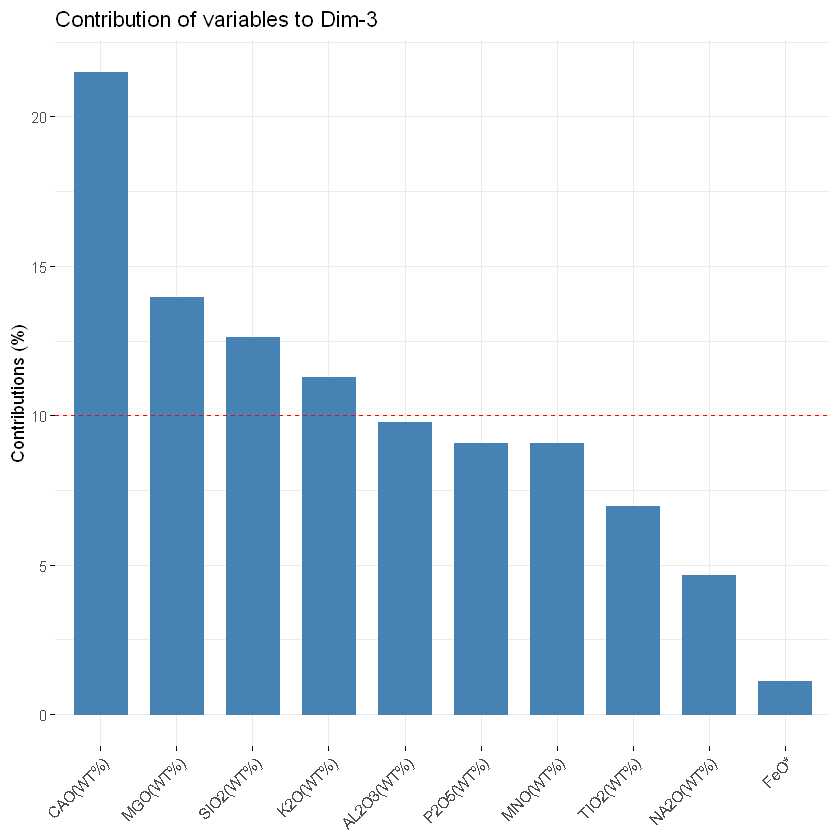

In [24]:
library(factoextra)
library(corrplot)

pca <- prcomp(non_imputated, scale = TRUE)
var <- get_pca_var(pca)

fviz_eig(pca, addlabels = TRUE)
corrplot(var$cos2, is.corr=FALSE)

for (i in 1:3) {
  print(fviz_pca_var(
    pca, 
    col.var = 'cos2', 
    gradient.cols = c('#00AFBB', '#E7B800', '#FC4E07'), 
    repel = TRUE,
    axes = c(i, i + 1)
  ))

  print(fviz_contrib(pca, choice = "var", axes = i, top = 10))
}

# fviz_pca_biplot(
#   pca,
#   repel=TRUE,
#   col.var = '#2E9FDF',
#   col.ind = '#696969',
# )

km <- kmeans(var$coord, centers = 3, nstart = 20)
grp <- as.factor(km$cluster)
fviz_pca_var(
  km,
  col.var = grp,
  palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
  legend.title = 'Cluster'
)

# Random Experiments

In [99]:
df <- data.frame(team=c('A', 'B', 'C', 'D', 'E'),
                 points=c(99, NA, NA, 88, 95),
                 assists=c(33, 28, 31, 39, 34),
                 rebounds=c(30, 28, 24, 24, NA))

new_df <- df[, colSums(is.na(df)) == 0]
df
new_df

team,points,assists,rebounds
<chr>,<dbl>,<dbl>,<dbl>
A,99,33,30
B,NA,28,28
C,NA,31,24
D,88,39,24
E,95,34,NA


team,assists
<chr>,<dbl>
A,33
B,28
C,31
D,39
E,34


In [ ]:
library(tidyverse)

df <- as.data.frame(hawaii)
temp <- df[, colSums(is.na(df)) == 0]
head(df)

# temp <- hawaii[complete.cases(hawaii), ]
# head(temp)

cols <- unlist(lapply(hawaii, is.numeric))
numeric <- hawaii[, cols]

# head(hawaii)